In [103]:
import numpy as np
import pickle
import pandas as pd

data = pd.read_csv("impact_load.csv", index_col=0)
np.count_nonzero(~np.isnan(data.to_numpy()))
data.iloc[0].to_numpy()

vibration = np.load("vibration_data.npy")

vibration[:,0,0]

array([0.0021363, 0.0027467, 0.0024415, ..., 0.0018311, 0.0021363,
       0.0018311])

In [143]:
# import os
# import numpy as np
# from tqdm import tqdm

# files = os.listdir('impact_data')
# vibration_impact = np.zeros((1277,4000,10))
# for i, file in enumerate(tqdm(files)):
#     vibration_impact[i] = np.genfromtxt(f'impact_data/{file}', delimiter=',')

# np.save("vibration_impact.npy", vibration_impact)

vibration_impact = np.load("vibration_impact.npy")
loads = np.load("loads.npy")
np.sum(vibration_impact[:,:,1:] == vibration[:,:,:]) == 1277*4000*9

True

In [122]:
vibration_impact[0,:,0]

array([-0.0085449 , -0.0082397 , -0.0088501 , ..., -0.00030518,
        0.        ,  0.00091556])

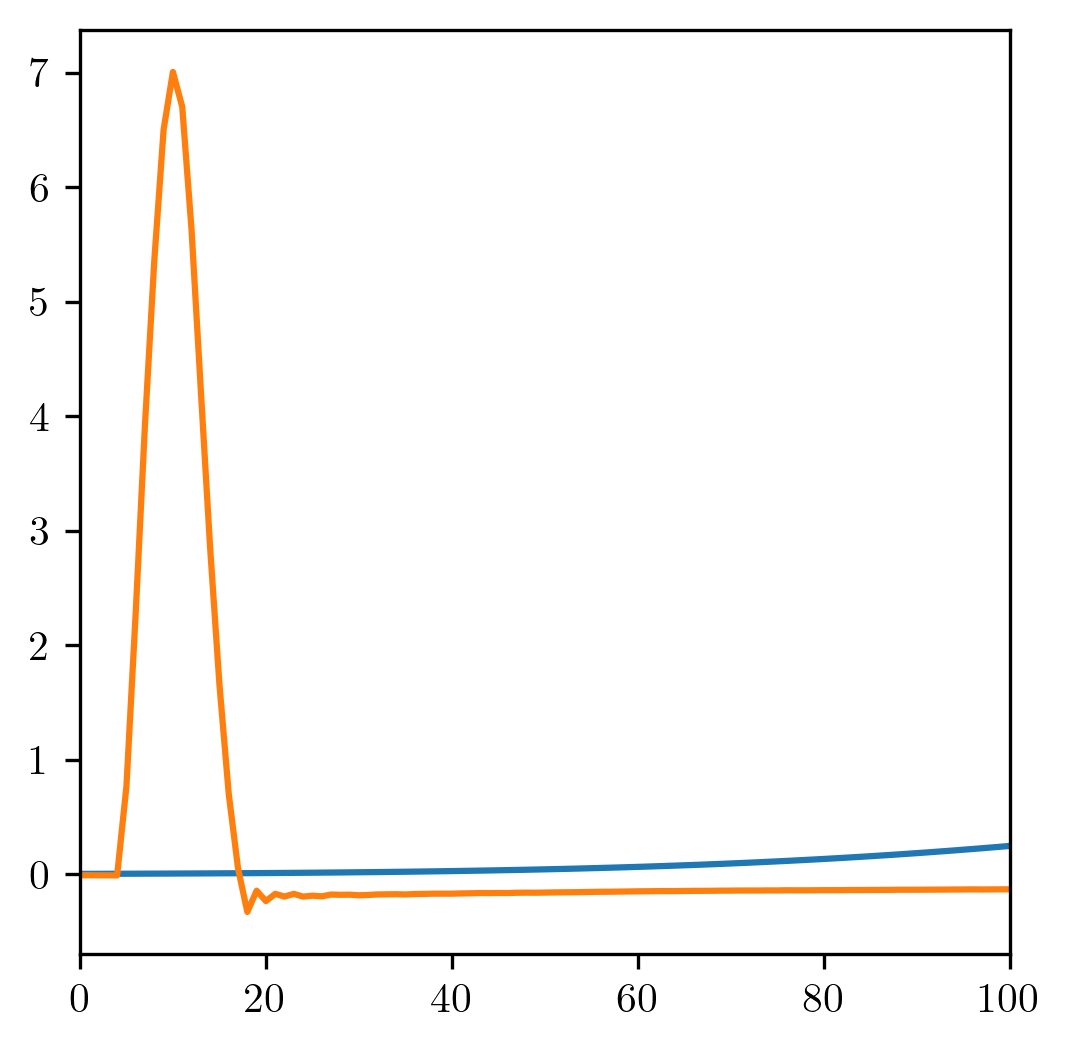

In [144]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
t = np.linspace(-1, 1, 2 * 4000, endpoint=False)
i, q, e = signal.gausspulse(t, fc=50, retquad=True, retenv=True)
plt.plot(e[3800:7800])
plt.plot(loads[0])
plt.xlim([0,100])
plt.show()

[Taichi] Starting on arch=cuda


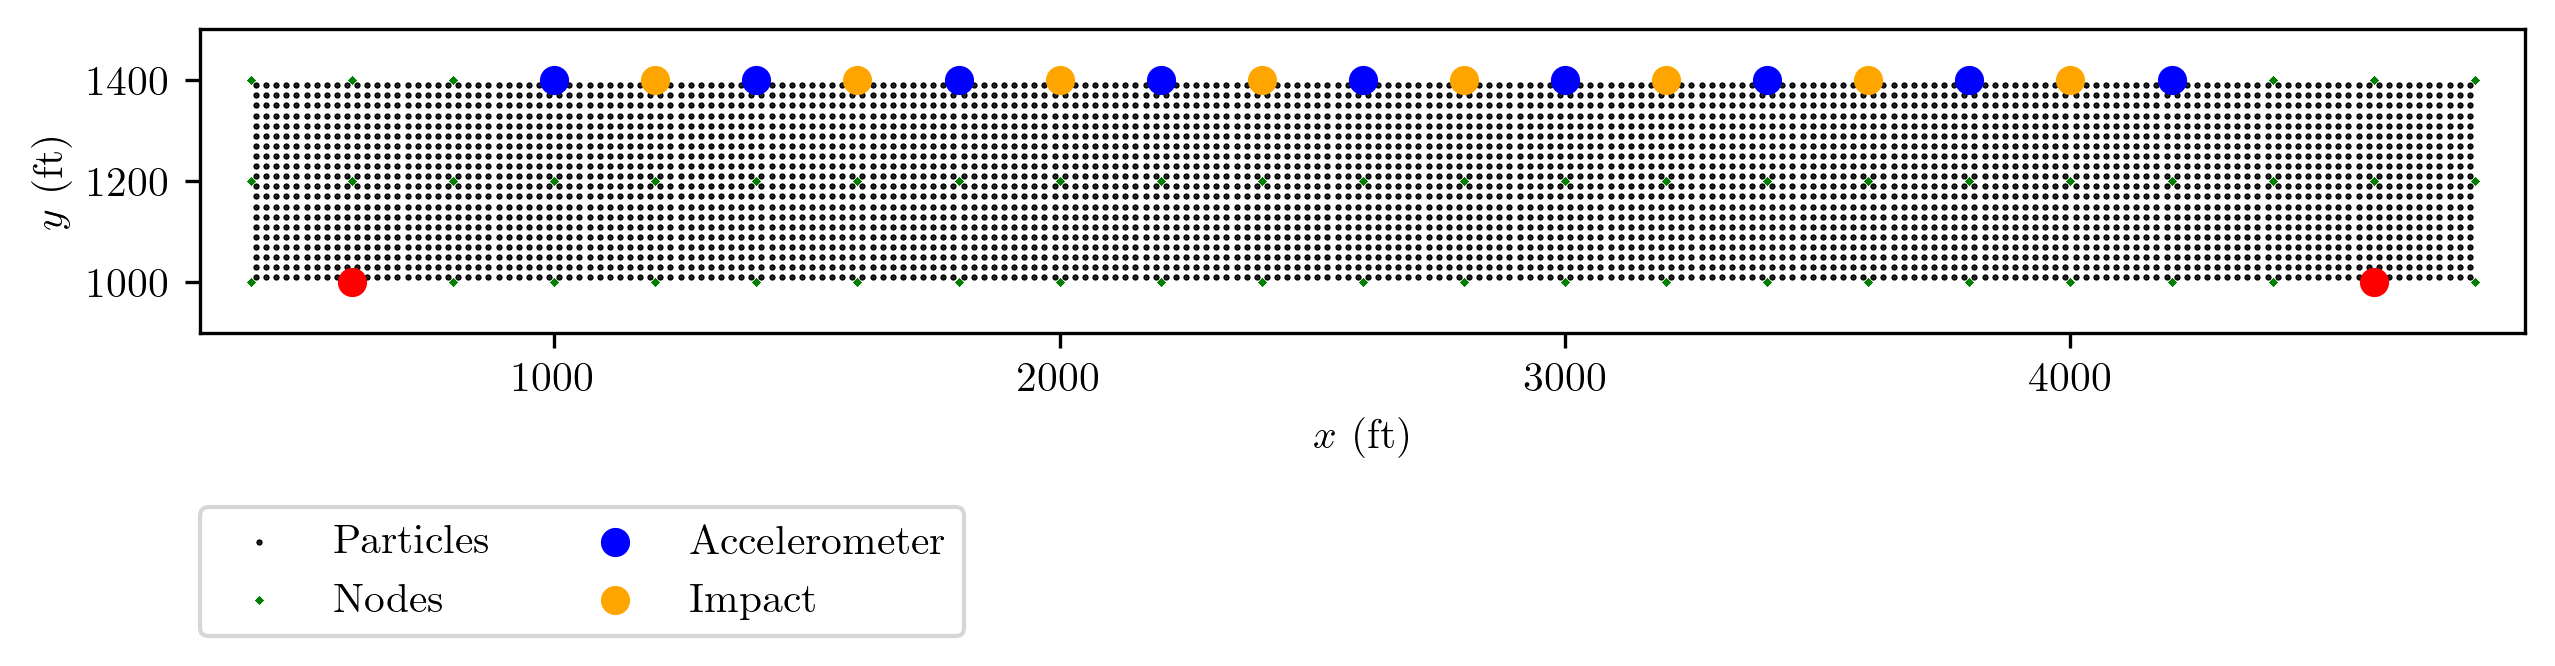

In [ ]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

ti.reset()
real = ti.f32
ti.init(arch=ti.cuda, default_fp=real, device_memory_GB=12)
# init parameters
size = 5000 # mm
span = 4400 # mm
depth = 400 # mm
dim = 2
Nx = int(span / 20)  # reduce to 30 if run out of GPU memory
Ny = int(depth / 20)
n_particles = int(Nx * Ny)
n_grid = 25
dx = size / n_grid
inv_dx = 1 / dx

x_p, y_p = np.zeros(n_particles), np.zeros(n_particles)
x_n, y_n = np.meshgrid(np.arange(n_grid)*dx, np.arange(n_grid)*dx)
for i in range(Nx):
    for j in range(Ny):
        x_p[j * Nx + i] = ((i)/(Nx) * 0.88 + 0.06 + 0.88 / Nx * 0.5) * size + 100
        y_p[j * Nx + i] = ((j)/(Ny) * 0.08 + 0.2 + 0.08 / Ny * 0.5) * size
n_particles = Nx * Ny



matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 20}
def gray(level):
    return (level, level, level)

plt.figure(figsize=(10, 3))
s=1
plt.scatter(x_p, y_p, color=gray(0), marker = '.',s=s, label='Particles')
# plt.plot(np.array([0.2, 0.84, 0.84, 0.2, 0.2])*size/12, np.array([0.36, 0.36, 0.4, 0.4, 0.36])*size/12, label='Beam boundary')
plt.scatter(x_n, y_n, color='g', marker='x', s=s, label='Nodes')
plt.scatter((3*dx,23*dx),(5*dx,5*dx), color='r')
plt.scatter(np.array([5, 7, 9, 11, 13, 15, 17, 19, 21])*dx, np.zeros(9)+dx*7, color='b', label='Accelerometer')
plt.scatter(np.array([6, 8, 10, 12, 14, 16, 18, 20])*dx, np.zeros(8)+dx*7, color='orange', label='Impact')

plt.legend(loc=(0, -1), ncol=2)
# plt.title('Material Points Used Per Observability Case')
plt.xlabel('$x$ (ft)')
plt.ylabel('$y$ (ft)')
plt.ylim((900, 1500))
plt.xlim((300, 4900))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
# plt.savefig('D:/Research/Masonry-Rail/3 Damage ID/test.png', dpi=300, bbox_inches = "tight")
plt.show()


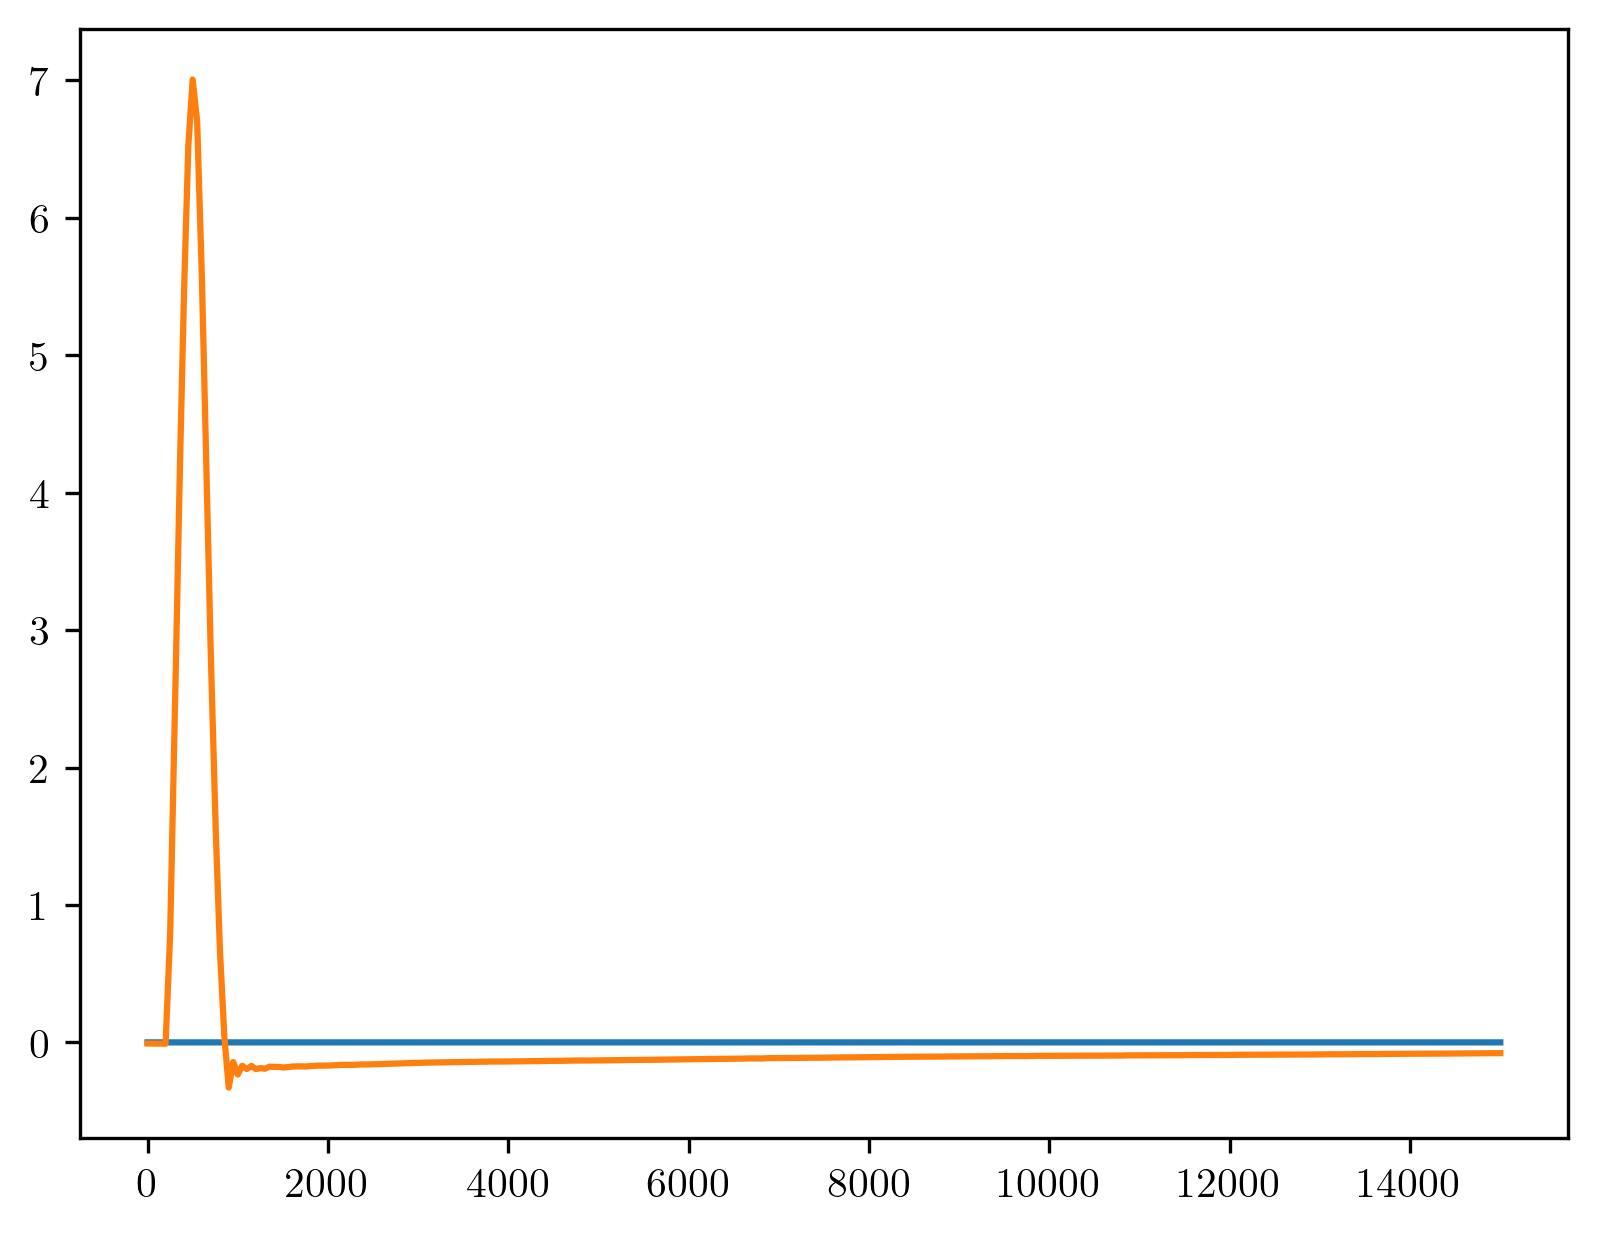

In [157]:
plt.plot(np.load("mpm_load.npy")[:,24,28])

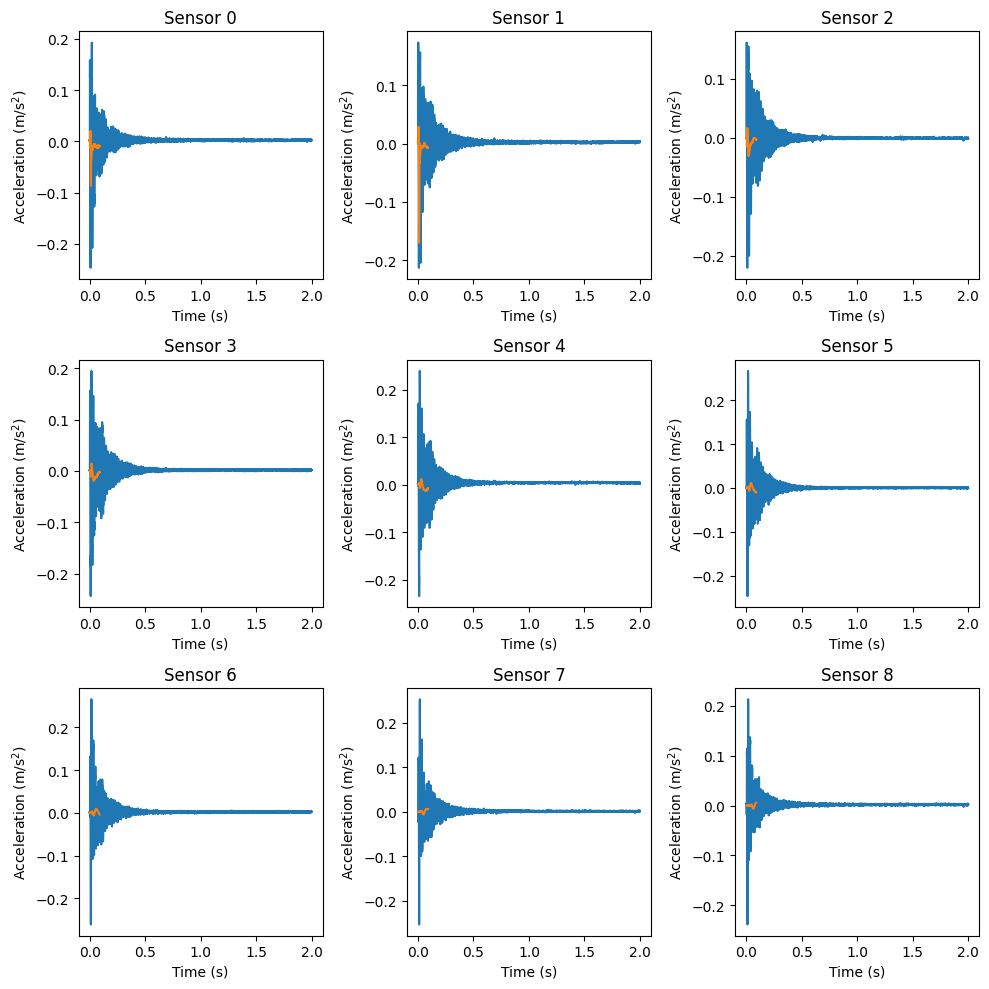

In [20]:
import numpy as np
import matplotlib.pyplot as plt

vibration_impact = np.load("vibration_impact.npy")

index = 0

size = 5.000 # 5 m
span = 4.400 # 4.4 m
depth = 0.400 # 0.4 m
dim = 2
factor = 1/100
Nx = int(span / factor)
Ny = int(depth / factor)
grid_factor = 4

sensor_locs = [int(x) for x in np.rint(Nx*np.arange(600,4200,400)/4400)]
g_locs = (np.array([6, 8, 10, 12, 14, 16, 18, 20, 22])-1)*grid_factor
model = np.load(f"a_0_{index}5.npy")
model_g = np.load(f"g_a_0_{index}5.npy")
vibration_impact

fig, axs = plt.subplots(3,3, layout="tight", figsize=(10,10))
# plt.subplots_adjust()
for sensor in range(9):
    row = int(sensor/3)
    col = sensor%3


    axs[row, col].plot(np.arange(4000)/2000, vibration_impact[index, :, sensor+1])
    axs[row, col].plot(np.arange(model.shape[0])/100000, model[:, sensor_locs[sensor], 1])
    axs[row, col].set_xlabel('Time (s)')
    axs[row, col].set_ylabel('Acceleration (m/s$^2$)')
    axs[row, col].set_title(f"Sensor {sensor}")
plt.show()

[60, 100, 140, 180, 220, 260, 300, 340, 380]


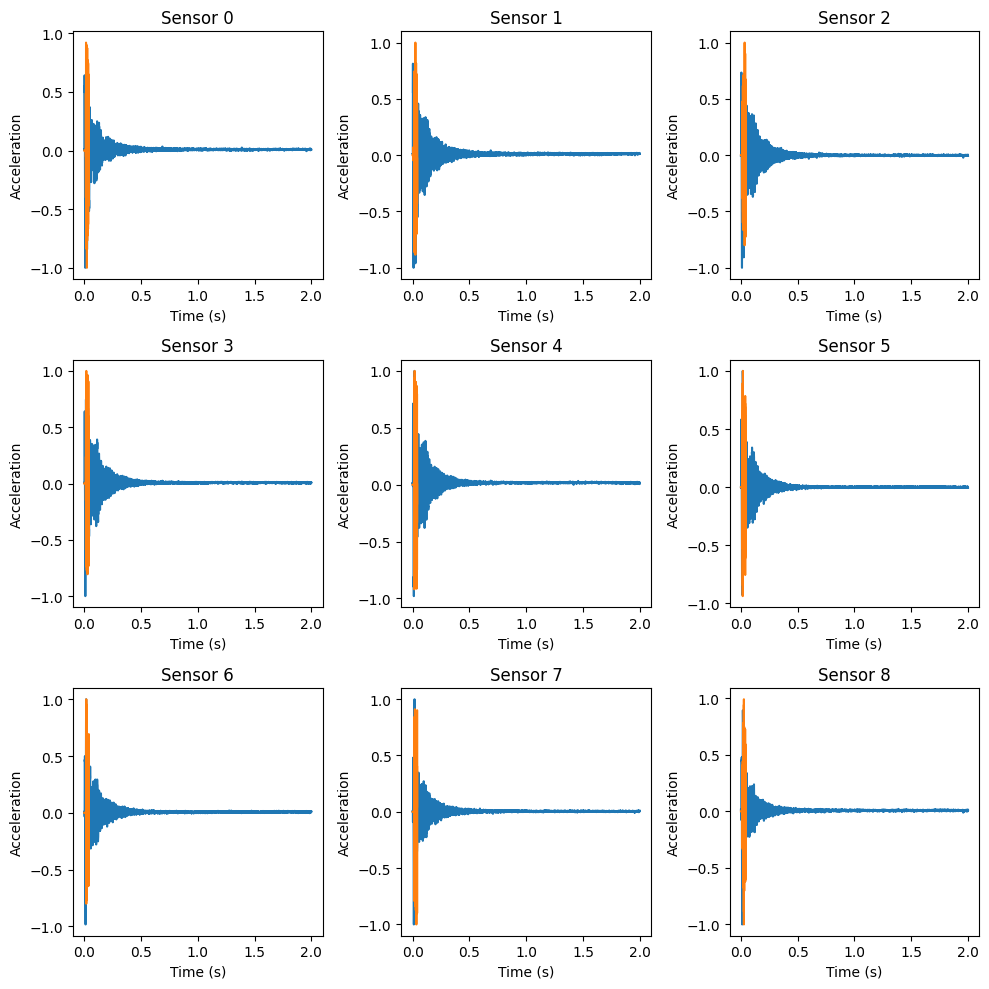

In [13]:
import numpy as np
import matplotlib.pyplot as plt

vibration_impact = np.load("vibration_impact.npy")

index = 0

size = 5.000 # 5 m
span = 4.400 # 4.4 m
depth = 0.400 # 0.4 m
dim = 2
factor = 1/100
Nx = int(span / factor)
Ny = int(depth / factor)
n_particles = int(Nx * Ny)

sensor_locs = [int(x) for x in np.rint(Nx*np.arange(600,4200,400)/4400)]
model = np.load(f"a_0_{index}5.npy")
print(sensor_locs)
vibration_impact

fig, axs = plt.subplots(3,3, layout="tight", figsize=(10,10))
# plt.subplots_adjust()
for sensor in range(9):
    row = int(sensor/3)
    col = sensor%3


    axs[row, col].plot(np.arange(4000)/2000, vibration_impact[index, :, sensor+1] / np.max(np.abs(vibration_impact[index, :, sensor+1])))
    axs[row, col].plot(np.arange(model.shape[0])/100000, model[:, sensor_locs[sensor], 1] / np.max(np.abs(model[:, sensor_locs[sensor], 1])))
    axs[row, col].set_xlabel('Time (s)')
    axs[row, col].set_ylabel('Acceleration')
    axs[row, col].set_title(f"Sensor {sensor}")
plt.show()

[17410 17430 17450 17470 17490 17510 17530 17550 17570]


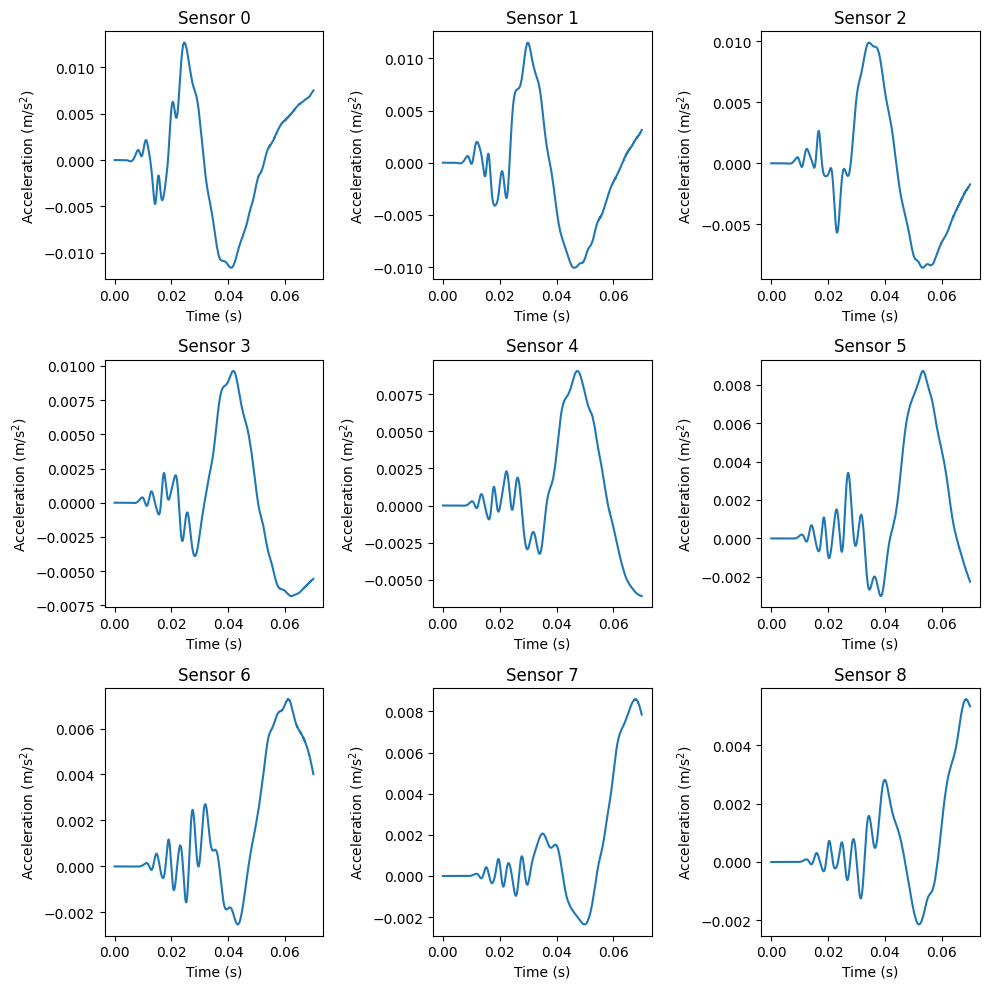

In [19]:
import numpy as np
import matplotlib.pyplot as plt

vibration_impact = np.load("vibration_impact.npy")

index = 0

n_particles = 17600
sensor = 0
sensor_locs = (np.arange(9))*20 + n_particles - 19*10
model = np.load(f"a_0_{index}5.npy")
print(sensor_locs)
vibration_impact

fig, axs = plt.subplots(3,3, layout="tight", figsize=(10,10))
# plt.subplots_adjust()
for sensor in range(9):
    row = int(sensor/3)
    col = sensor%3


    # axs[row, col].plot(np.arange(4000)/2000, vibration_impact[index, :, sensor+1])
    axs[row, col].plot(np.arange(model.shape[0])/100000, model[:, sensor_locs[sensor], 1])
    axs[row, col].set_xlabel('Time (s)')
    axs[row, col].set_ylabel('Acceleration (m/s$^2$)')
    axs[row, col].set_title(f"Sensor {sensor}")
plt.show()

[Taichi] Starting on arch=cuda


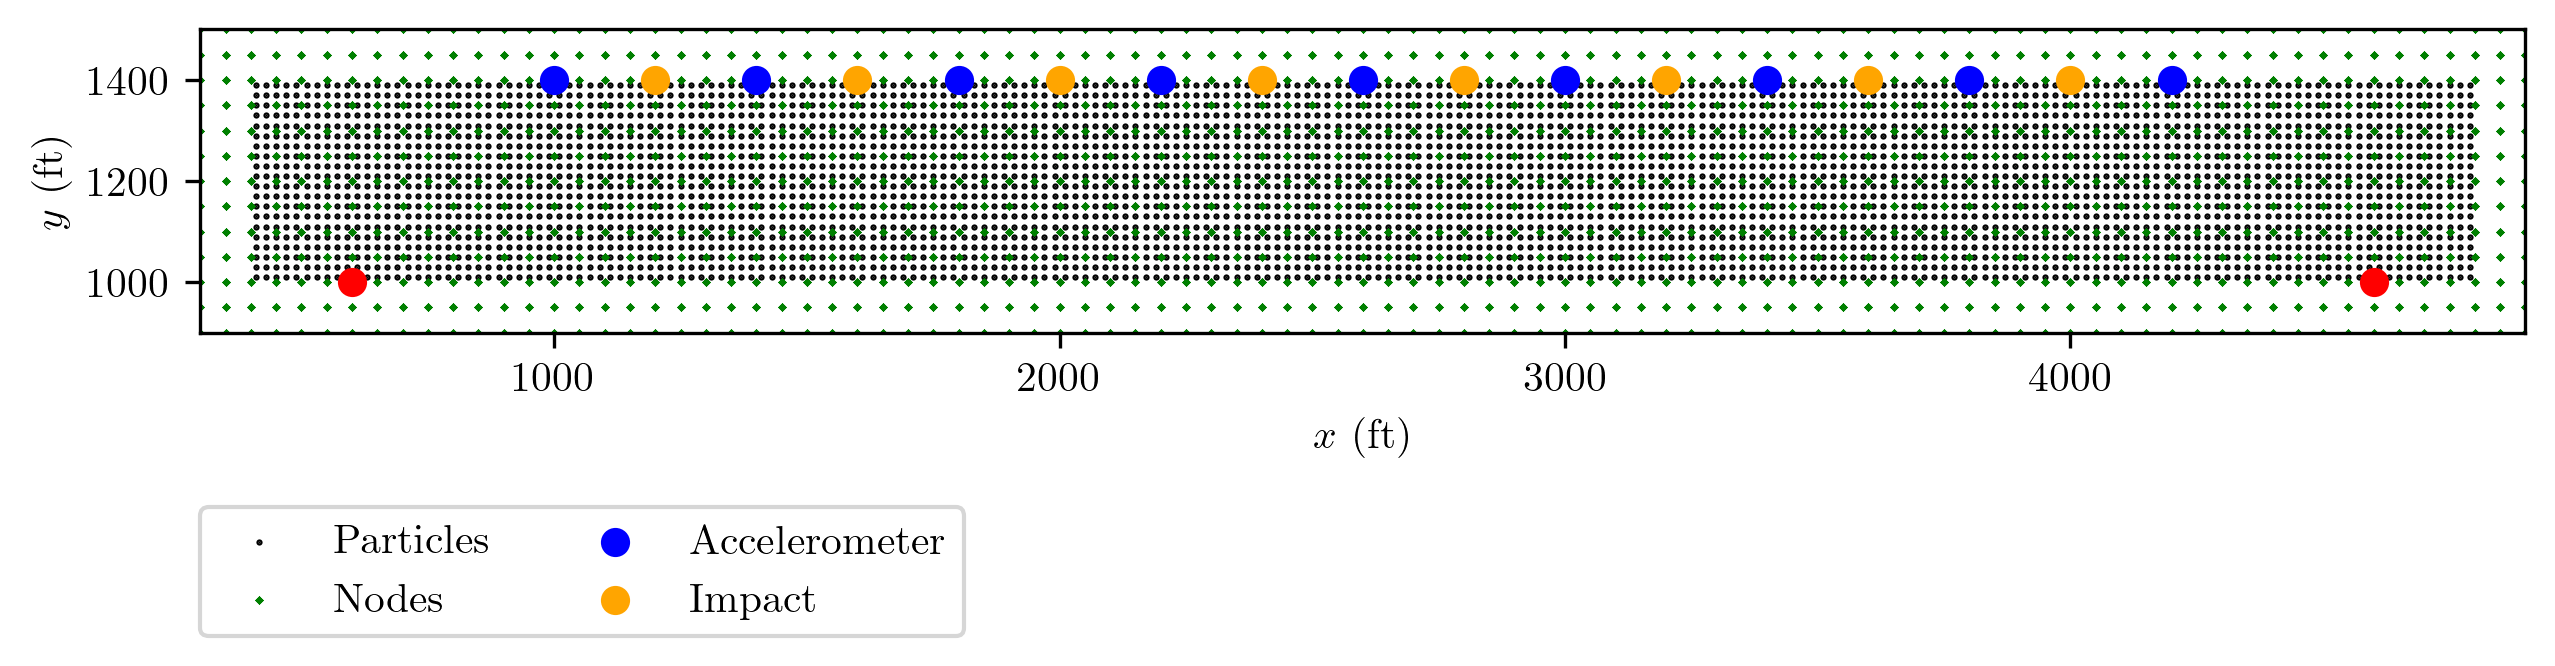

In [160]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

ti.reset()
real = ti.f32
ti.init(arch=ti.cuda, default_fp=real, device_memory_GB=12)
# init parameters
size = 5000 # mm
span = 4400 # mm
depth = 400 # mm
dim = 2
Nx = int(span / 20)  # reduce to 30 if run out of GPU memory
Ny = int(depth / 20)
n_particles = int(Nx * Ny)
n_grid = 100
dx = size / n_grid
inv_dx = 1 / dx

x_p, y_p = np.zeros(n_particles), np.zeros(n_particles)
x_n, y_n = np.meshgrid(np.arange(n_grid)*dx, np.arange(n_grid)*dx)
for i in range(Nx):
    for j in range(Ny):
        x_p[j * Nx + i] = ((i)/(Nx) * 0.88 + 0.06 + 0.88 / Nx * 0.5) * size + 100
        y_p[j * Nx + i] = ((j)/(Ny) * 0.08 + 0.2 + 0.08 / Ny * 0.5) * size
n_particles = Nx * Ny



matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 20}
def gray(level):
    return (level, level, level)

plt.figure(figsize=(10, 3))
s=1
plt.scatter(x_p, y_p, color=gray(0), marker = '.',s=s, label='Particles')
# plt.plot(np.array([0.2, 0.84, 0.84, 0.2, 0.2])*size/12, np.array([0.36, 0.36, 0.4, 0.4, 0.36])*size/12, label='Beam boundary')
plt.scatter(x_n, y_n, color='g', marker='x', s=s, label='Nodes')
plt.scatter((12*dx,92*dx),(20*dx,20*dx), color='r')
plt.scatter(np.array([5, 7, 9, 11, 13, 15, 17, 19, 21])*dx*4, np.zeros(9)+dx*7*4, color='b', label='Accelerometer')
plt.scatter(np.array([6, 8, 10, 12, 14, 16, 18, 20])*dx*4, np.zeros(8)+dx*7*4, color='orange', label='Impact')

plt.legend(loc=(0, -1), ncol=2)
# plt.title('Material Points Used Per Observability Case')
plt.xlabel('$x$ (ft)')
plt.ylabel('$y$ (ft)')
plt.ylim((900, 1500))
plt.xlim((300, 4900))
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
# plt.savefig('D:/Research/Masonry-Rail/3 Damage ID/test.png', dpi=300, bbox_inches = "tight")
plt.show()


[17410 17430 17450 17470 17490 17510 17530 17550 17570]


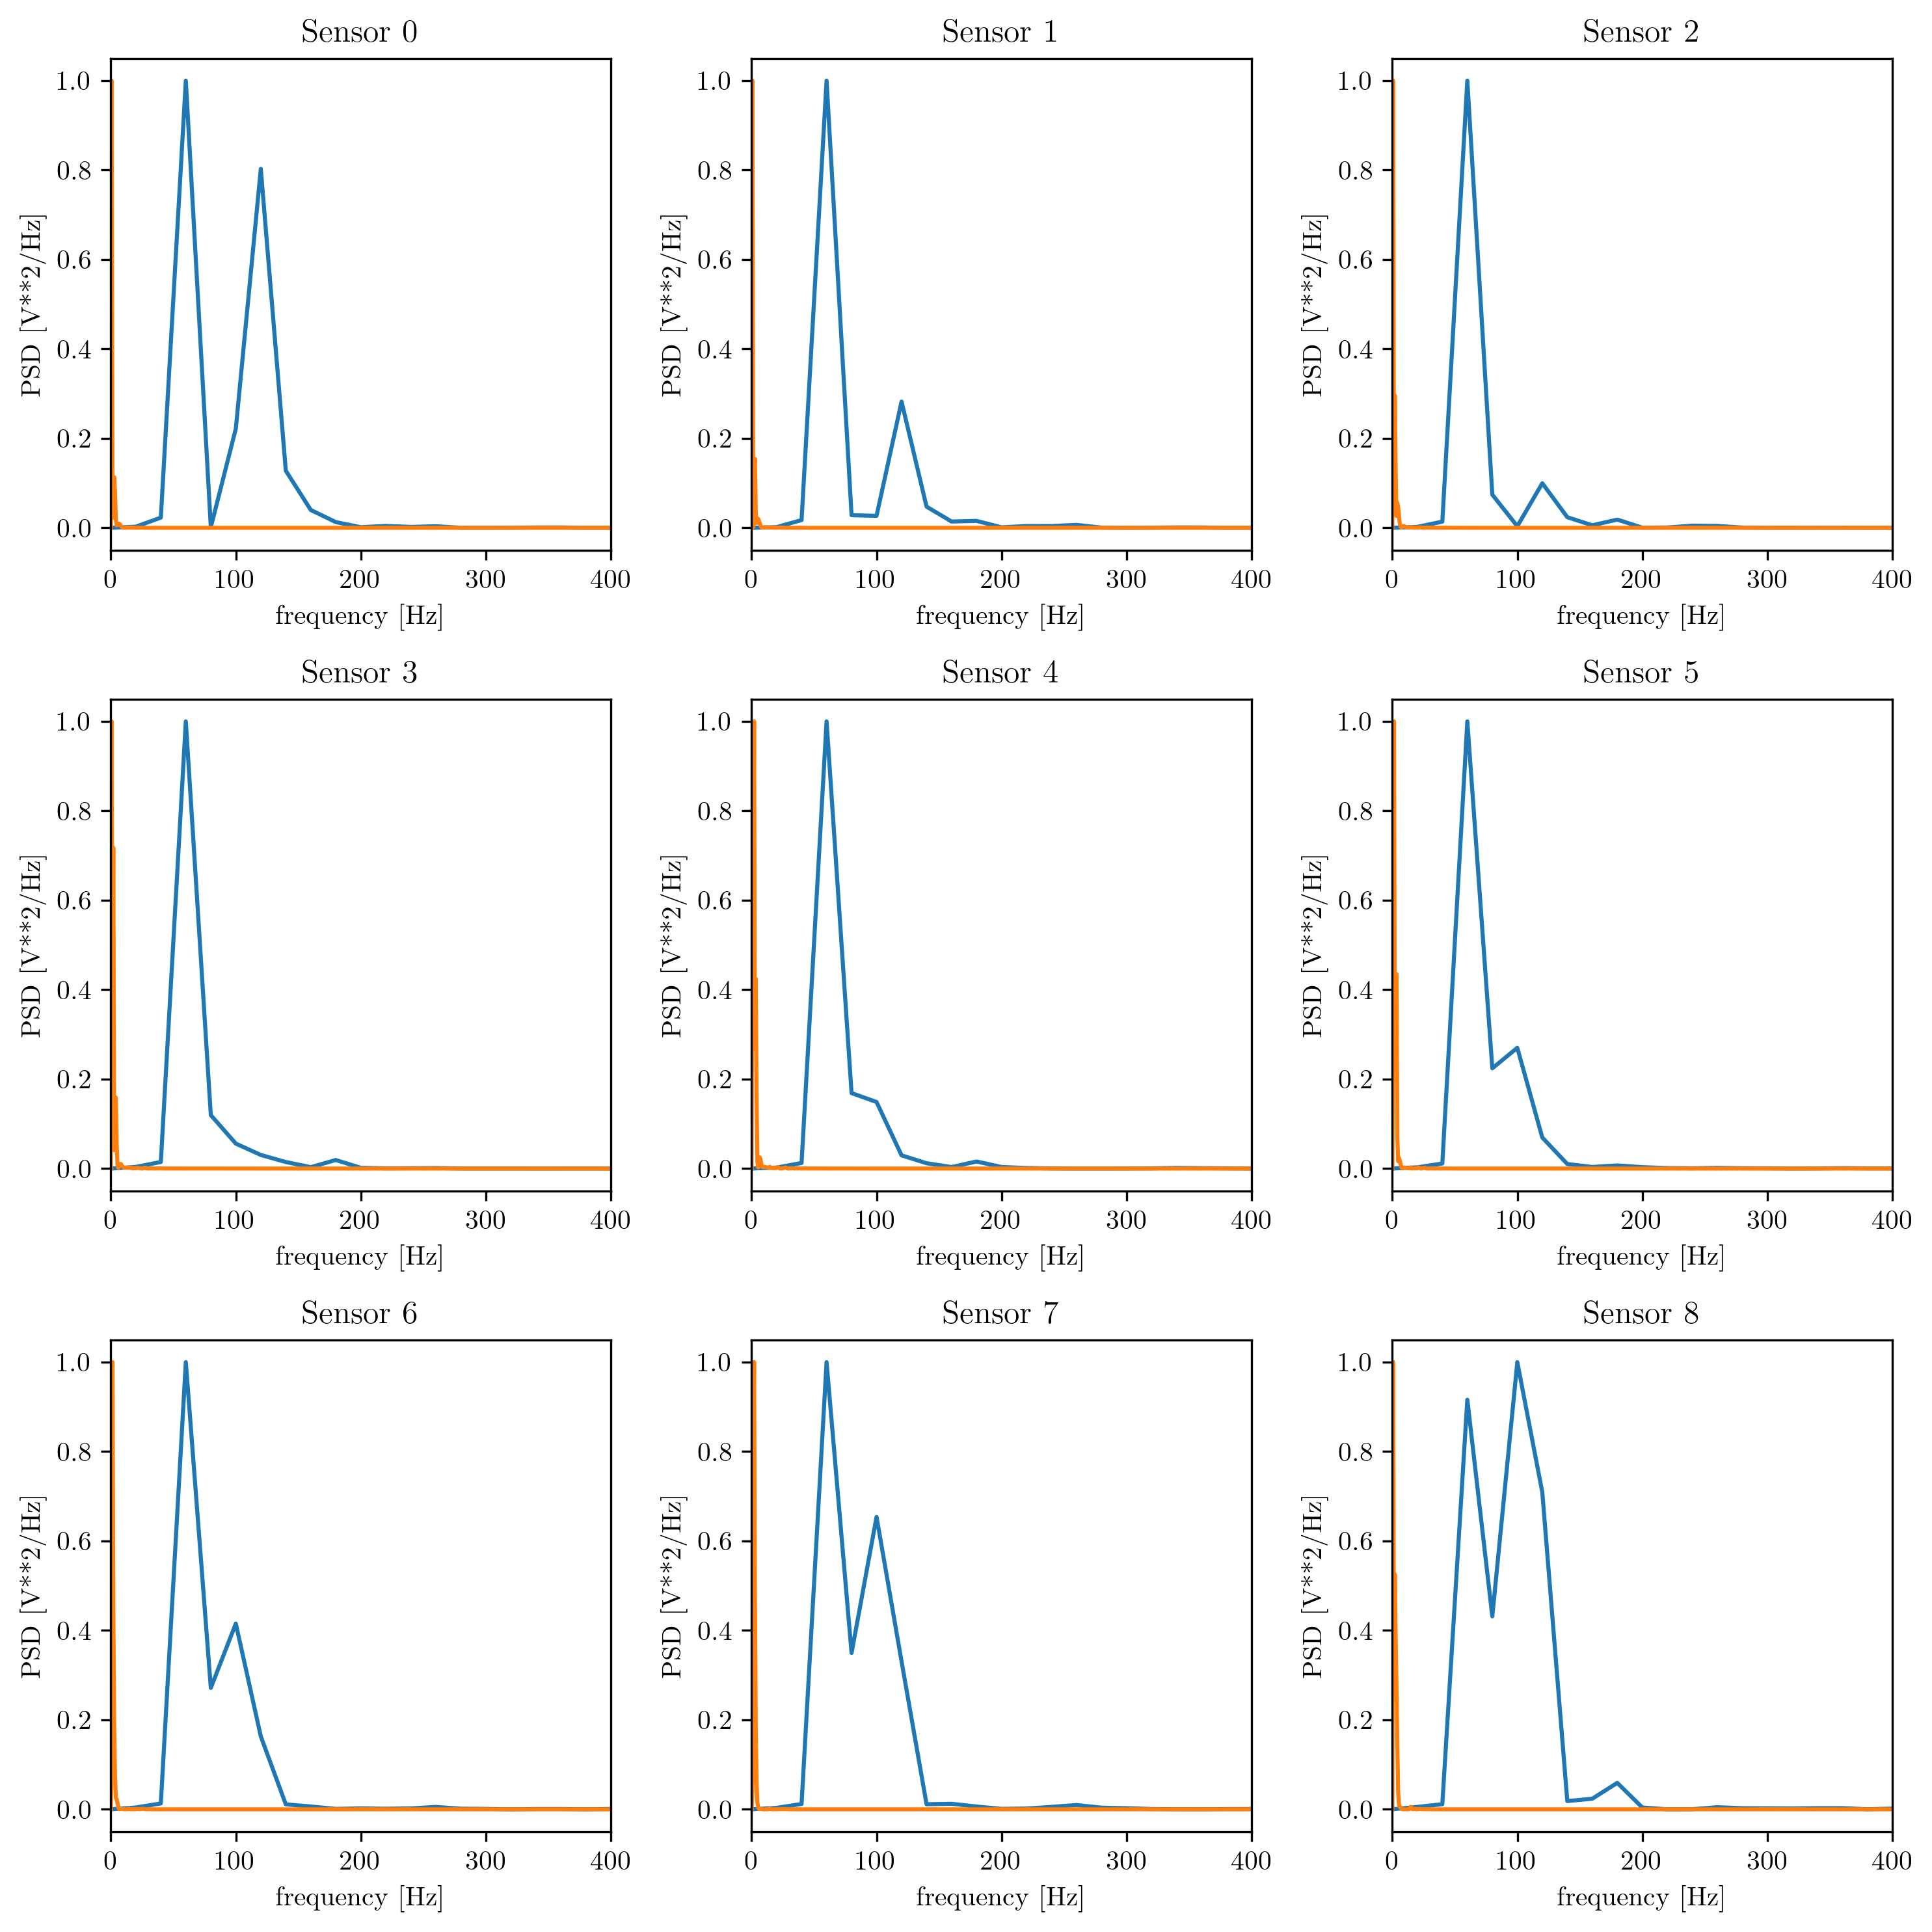

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

vibration_impact = np.load("vibration_impact.npy")

index = 0

n_particles = 17600
sensor = 0
sensor_locs = (np.arange(9))*20 + n_particles - 19*10
model = np.load(f"a_0_{index}5.npy")
print(sensor_locs)
vibration_impact

fig, axs = plt.subplots(3,3, layout="tight", figsize=(10,10))
# plt.subplots_adjust()
for sensor in range(9):
    row = int(sensor/3)
    col = sensor%3

    f, Pxx_den = signal.periodogram(vibration_impact[index, :int(0.05*2000), sensor+1], 2000)
    f_mpm, Pxx_den_mpm = signal.periodogram(model[:, sensor_locs[sensor], 1]/(1000), 10000)



    axs[row, col].plot(f, Pxx_den / np.max(Pxx_den))
    axs[row, col].plot(f_mpm, Pxx_den_mpm / np.max(Pxx_den_mpm))
    axs[row, col].set_xlabel('frequency [Hz]')
    axs[row, col].set_ylabel('PSD [V**2/Hz]')
    axs[row, col].set_title(f"Sensor {sensor}")
    axs[row, col].set_xlim([0, 400])
plt.show()